# Chapter 6. GLMの応用範囲をひろげる - ロジスティック回帰など -

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import *
from matplotlib import lines

In [5]:
data4a_pd=pd.read_csv('./data4a.csv')

In [5]:
data4a_pd

,N,y,x,f
0,8,1,9.76,C
1,8,6,10.48,C
2,8,5,10.83,C
3,8,6,10.94,C
4,8,1,9.37,C
5,8,1,8.81,C
6,8,3,9.49,C
7,8,6,11.02,C
8,8,0,7.97,C
9,8,8,11.55,C


In [6]:
data4a_pd.describe() 

,N,y,x
count,100,100.000000,100.000000
mean,8,5.080000,9.967200
std,0,2.743882,1.088954
min,8,0.000000,7.660000
25%,8,3.000000,9.337500
50%,8,6.000000,9.965000
75%,8,8.000000,10.770000
max,8,8.000000,12.440000


In [17]:
data4a_pd.f.describe() 

count     100
unique      2
top         C
freq       50
Name: f, dtype: object

In [11]:
#f_C=np.where(data4a_pd['f']=='C')

In [12]:
#f_T=np.where(data4a_pd['f']=='T')

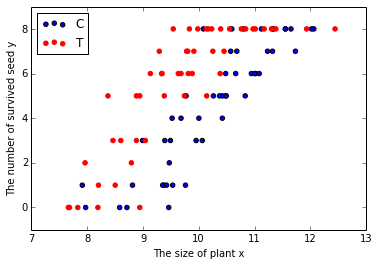

In [27]:
plt.scatter(data4a_pd['x'][data4a_pd['f']=='C'],data4a_pd['y'][data4a_pd['f']=='C'],label='C')
plt.scatter(data4a_pd['x'][data4a_pd['f']=='T'],data4a_pd['y'][data4a_pd['f']=='T'],label='T',color='red')
plt.legend(loc='upper left')
plt.xlabel('The size of plant x')
plt.ylabel('The number of survived seed y')
plt.show()

In [73]:
q01=np.random.binomial(8.0,0.1,100)
q03=np.random.binomial(8.0,0.3,100)
q08=np.random.binomial(8.0,0.8,100)

In [74]:
q08

array([4, 6, 7, 7, 5, 8, 7, 7, 5, 6, 7, 8, 5, 5, 7, 7, 4, 7, 7, 7, 7, 7, 7,
       6, 6, 6, 7, 6, 7, 7, 6, 6, 6, 7, 6, 6, 7, 6, 8, 5, 5, 6, 6, 7, 5, 6,
       5, 4, 5, 5, 7, 7, 8, 6, 8, 6, 7, 7, 8, 7, 6, 7, 6, 6, 7, 7, 4, 8, 6,
       8, 7, 5, 5, 6, 8, 7, 8, 7, 8, 6, 6, 5, 8, 5, 6, 6, 7, 8, 7, 7, 8, 6,
       7, 7, 6, 7, 7, 8, 5, 6])

ー二項分布に従ったカウント数を出力できる
np.random.binomial(n,p,100)
pの確率で成功(種子が生き残る)するのをn回見て、成功回数を出力*100セット
今回はヒストグラムを出力

In [81]:
hist_q01, bin_edges_q01 = np.histogram(q01,bins=9, range=(-0.5,8.5))
bin_centres = (bin_edges_q01[:-1] + bin_edges_q01[1:]) / 2
hist_q03, bin_edges_q03 = np.histogram(q03,bins=9, range=(-0.5,8.5))
hist_q08, bin_edges_q08 = np.histogram(q08,bins=9, range=(-0.5,8.5))

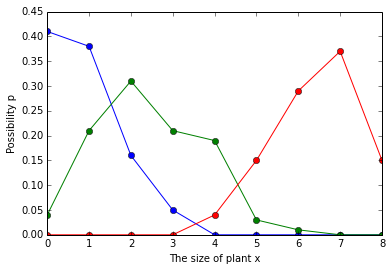

In [113]:
plt.plot(bin_centres,hist_q01/100.0,'b-o')
plt.plot(bin_centres,hist_q03/100.0,'g-o')
plt.plot(bin_centres,hist_q08/100.0,'r-o')
plt.xlabel('The size of plant x')
plt.ylabel('Possibility p')
#blue:q=0.1, green:q=0.3, red:q=0.8

**6.4 ロジスティック回帰とロジットリンク関数**   
ロジスティック回帰は、二項分布を使った統計モデルの１つ   

GLM：確率分布・リンク関数・線形予測子の組み合わせ   
ポアソン回帰の場合、正準リンク関数は対数リンク関数   

6.4.1 ロジットリンク関数   
ロジスティック回帰の正準リンク関数として、「ロジットリンク関数」を使用   

★ロジスティック関数  
$q_{i}=logistic(z_{i})=¥frac{1}{1+exp(-z_{i})}$  

$z_{i}=¥beta_{1}+¥beta_{2}x_{i}$.......(線形予測子)  

In [97]:
z_test1=np.arange(-7,7,0.001)

In [102]:
q2=1.0/(1.0+np.exp(-z_test1))

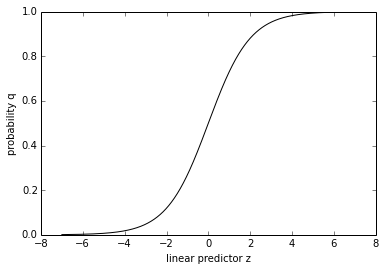

In [108]:
plt.plot(z_test1,q2,c='k')
plt.xlabel('linear predictor z')
plt.ylabel('probability q')



ロジスティック関数はこんな形で、qがzのロジスティック関数と仮定すれば、zがどんな値でも必ず  
$z¥leq q_{i} ¥leq 1$  
にな生存確率が身体のサイズのみに依存するとすると、
$z_{i}=¥beta{1}+¥beta{2}x_{i}$

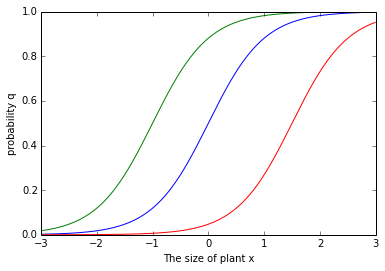

In [106]:
x_test2=np.arange(-3,3,0.01)
z_test2_1=0+2*x_test2
z_test2_2=2+2*x_test2
z_test2_3=-3+2*x_test2


z_test3_1=0+2*x_test2
z_test3_2=0+-1*x_test2
z_test3_3=0+4*x_test2

q2_1=1.0/(1.0+np.exp(-z_test2_1))
q2_2=1.0/(1.0+np.exp(-z_test2_2))
q2_3=1.0/(1.0+np.exp(-z_test2_3))
q3_1=1.0/(1.0+np.exp(-z_test3_1))
q3_2=1.0/(1.0+np.exp(-z_test3_2))
q3_3=1.0/(1.0+np.exp(-z_test3_3))
plt.plot(x_test2,q2_1,c='b')
plt.plot(x_test2,q2_2,c='g')
plt.plot(x_test2,q2_3,c='r')
plt.xlabel('The size of plant x')
plt.ylabel('probability q')
#β2=2, blue:β1=0, green：β1=2, red:β1=-3

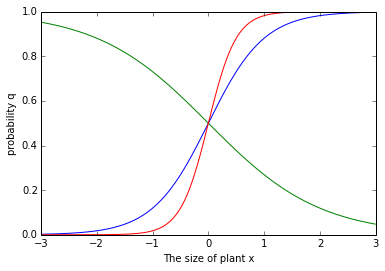

In [109]:
plt.plot(x_test2,q3_1,c='b')
plt.plot(x_test2,q3_2,c='g')
plt.plot(x_test2,q3_3,c='r')
plt.xlabel('The size of plant x')
plt.ylabel('probability q')
#β1=0, blue:β2=2, green：β2=-1, red:β2=4

ロジスティック関数を変形する  
$¥ln{¥frac{q_{i}}{1-q_{i}}}=z_{i}$  
この左辺をロジット関数(logit function)という

6.4.2 パラメーター推定   
尤度(「当てはまりの良さ」をあらわす統計量を最大にするようなパラメーター)  
p.122式→logを取って対数尤度関数得て、最尤推定(これを最大にするβiのセットを探す)  


In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = smf.glm('y + I(N-y) ~ x + f', data=data4a_pd, family=sm.families.Binomial()) #y,N-yで生存した数、死んだ数を分けている
                                                                                    #二項分布なのでBinomial
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Tue, 17 May 2016   Deviance:                       123.03
Time:                        01:52:23   Pearson chi2:                     109.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000       -22.307   -16.765
f[T.T]         2.0215      0.231      8.740      0.0

In [13]:
b1, b2, b3=results.params
x1=np.arange(data4a_pd['x'][data4a_pd['f']=='C'].min(),data4a_pd['x'][data4a_pd['f']=='C'].max(),0.1)
x2=np.arange(data4a_pd['x'][data4a_pd['f']=='T'].min(),data4a_pd['x'][data4a_pd['f']=='T'].max(),0.1)

d1=1.0
z1_C=b1+b2*x1
z1_T=b1+b2*x2+b3*d1
plt.scatter(data4a_pd['x'][data4a_pd['f']=='C'],data4a_pd['y'][data4a_pd['f']=='C'],label='C')
plt.scatter(data4a_pd['x'][data4a_pd['f']=='T'],data4a_pd['y'][data4a_pd['f']=='T'],label='T',c='r')
plt.plot(x1,x1*1/(1+np.exp(-z1_C)),c='b')
plt.plot(x2,x2*1/(1+np.exp(-z1_T)),c='r')
plt.legend(loc='upper left')
plt.xlabel('The size of plant x')
plt.ylabel('The number of survived seed y')
plt.show()

¥begin{equation}
frac{1}{1+exp(-z_{i})}=exp(z_{i})  ¥¥
=exp(¥beta_{1})exp(¥beta_{2}x_{i})exp(¥beta_{2}f_{i})  ¥¥
¥end{equation}



オッズ(odds)  

ギャンブルとかでよく聞く単語ですね。オッズが低い程、勝ったときの儲けは上がります。  
例えばサイコロの目で6が出るとかに賭けたとすると、確率は1/6=0.167で、  
オッズ＝0.167/1-0.167=0.20になって、100円賭けてると、100/0.20=500円の儲けになりますよ、という感じ  
複数賭けが可能なら、たとえば6以外の目が出るのに賭けてみましょう。5/6=0.833
オッズ=0.833/0.167=4.99になって、100/4.99=20円の儲けです。うーん。これでも10000賭けたら2000儲かるとなると、かなりおいしいような気がするのですがどうか。なんか計算間違ってる気がする・・・こんなに儲けなさそう。

そして、今回のオッズは$frac{1}{1+exp(-z_{i})} ¥propto exp(1.95x_{i})exp(2.02f_{i})$  
となり、例えば個体iの大きさが1単位増加したら、exp(1.95)~7倍の増加
施肥処理をした場合だと、exp(2.02)~7.5倍の増加
Xをすると、病気になるリスクが7倍→このリスクが、xとそうでない場合のオッズ比

6.4 ロジスティック回帰のモデル選択

In [50]:
model1 = smf.glm('y + I(N-y) ~ x+f', data=data4a_pd, family=sm.families.Binomial()) 
results1 = model1.fit()
print(results1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -133.11
Date:                Tue, 17 May 2016   Deviance:                       123.03
Time:                        02:03:49   Pearson chi2:                     109.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -19.5361      1.414    -13.818      0.000       -22.307   -16.765
f[T.T]         2.0215      0.231      8.740      0.0

In [51]:
model2 = smf.glm('y + I(N-y) ~ x', data=data4a_pd, family=sm.families.Binomial())
results2 = model2.fit()
print(results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -180.17
Date:                Tue, 17 May 2016   Deviance:                       217.17
Time:                        02:04:01   Pearson chi2:                     185.
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -13.7785      1.077    -12.789      0.000       -15.890   -11.667
x              1.4626      0.111     13.214      0.0

In [53]:
model3 = smf.glm('y + I(N-y)~ f', data=data4a_pd, family=sm.families.Binomial()) #family: 分布関数の指定
results3 = model3.fit()
print(results3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -316.88
Date:                Tue, 17 May 2016   Deviance:                       490.58
Time:                        02:04:10   Pearson chi2:                     399.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3433      0.101      3.383      0.001         0.144     0.542
f[T.T]         0.4335      0.148      2.930      0.0

In [54]:
model4 = smf.glm('y + I(N-y) ~ 1', data=data4a_pd, family=sm.families.Binomial()) #family: 分布関数の指定
results4 = model4.fit()
print(results4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -321.20
Date:                Tue, 17 May 2016   Deviance:                       499.23
Time:                        02:04:17   Pearson chi2:                     402.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.5537      0.073      7.540      0.000         0.410     0.698


In [79]:
model5 = smf.glm('y + I(N-y)~ x + I(x**2) +I(x**3) +I(x**4) +I(x**5) +I(x**6) +I(x**7) +I(x**8) + f', data=data4a_pd, family=sm.families.Binomial())
results5=model5.fit()
print(results5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       91
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -131.54
Date:                Tue, 17 May 2016   Deviance:                       119.90
Time:                        02:17:06   Pearson chi2:                     107.
No. Iterations:                    14                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -3.227e+04   3.54e+04     -0.912      0.362     -1.02e+05  3.71e+04
f[T.T]         2.0149      0.235      8.587      0.0

In [81]:
print 'Log_likelihood'
print results1.llf #x+f
print results2.llf #x
print results3.llf #f
print results4.llf #const
print results5.llf #full(8th-order)


Log_likelihood
-133.105564643
-180.172721642
-316.879876728
-321.204670831
-131.540524228


3章同様フルモデルが最大対数尤度が高い。

In [86]:
print 'AIC'
print -2*(results1.llf-3) #x+f
print -2*(results2.llf-2) #x
print -2*(results3.llf-2) #f
print -2*(results4.llf-1) #const
print -2*(results5.llf-9) #full(8th-order)


AIC
272.211129285
364.345443284
637.759753457
644.409341662
281.081048456


fullモデルは本当は100次式(AIC=343.2)  
今回x+fモデルが、AICの観点で最良

6.5 交互作用項の入った線形予測子  
確率に関わるものの掛け合わせ


In [84]:
model = smf.glm('y + I(N-y) ~ x*f', data=data4a_pd, family=sm.families.Binomial()) 
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -132.81
Date:                Tue, 17 May 2016   Deviance:                       122.43
Time:                        07:52:39   Pearson chi2:                     109.
No. Iterations:                     8                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -18.5233      1.886     -9.821      0.000       -22.220   -14.827
f[T.T]        -0.0638      2.704     -0.024      0.9

この時、AIC=-2*(logL*-k)=-2*(-132.81-4)=273.62  
x*fとx+fモデルの間に違いはほぼ無いが(p129・図6.9と式)、今回はx+fモデルの方が良い  
交互作用項はその数字だけみてもわからない事が多いので、図示する必要あり。  
★むやみに交互作用項を入れない   
・変数が多い場合、組み合わせ数が増えて推定できない  
・交互作用項が多い統計モデルが最良と判定される場合、作用効果を過大評価しているおそれあり  
以上から、過度に複雑なモデルが選ばれる危険がある

6.6 割り算値の統計モデリングはやめよう  
ロジスティック回帰の利点は、確率を考える時に観測データの割り算が必要ない事  
割り算値を使用した場合、  
・情報が失われる  
・変換値の分布がどうなるか→誤差の影響がある  
6.6.1 割り算値入らずのオフセット項わざ  
割り算使わなくても、もっと良い統計モデルがあるはず  
各調査地での植物の人口密度と、明るさの関係を調べたい
y : 植物個体数  
x : 明るさ
A : 面積

In [87]:
data4b_pd=pd.read_csv('./data4b.csv')

In [88]:
data4b_pd

,y,x,A
0,57,0.68,10.3
1,64,0.27,15.6
2,49,0.46,10.0
3,64,0.45,14.9
4,82,0.74,14.0
5,29,0.15,9.6
6,37,0.50,11.8
7,33,0.57,6.8
8,61,0.79,11.8
9,46,0.57,9.5


In [90]:
plt.scatter(data4b_pd['A'],data4b_pd['y'])
plt.xlabel('The size of region A')
plt.ylabel('The number of plants y')
plt.show()
#データの分布をプロット

人口密度を現すのに、割り算値を使う必要は無い  
p133式参照・人口密度を線形予測子で現す事で、オフセット項を含んだ対数リンク・ポアソン分布のGLMとなる。

In [99]:
model = smf.glm('y ~ x', offset=np.log(data4b_pd.A), data=data4b_pd, family=sm.families.Poisson())#オフセット項を入れる
results = model.fit()
print(results.summary())  
b1, b2=results.params

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -323.17
Date:                Tue, 17 May 2016   Deviance:                       81.608
Time:                        09:25:12   Pearson chi2:                     81.5
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9731      0.045     21.600      0.000         0.885     1.061
x              1.0383      0.078     13.364      0.0

オフセット項により、数が面積に比例する効果を反映させつつ、明るさの効果を推定できる

In [101]:
A_test=np.arange(0,20,0.1)
ave_1=np.exp(b1+b2*0.1+np.log(A_test))
ave_2=np.exp(b1+b2*0.3+np.log(A_test))
ave_3=np.exp(b1+b2*0.5+np.log(A_test))
ave_4=np.exp(b1+b2*0.7+np.log(A_test))
ave_5=np.exp(b1+b2*0.9+np.log(A_test))
plt.scatter(data4b_pd['A'],data4b_pd['y'])
plt.plot(A_test,ave_1,c='b')
plt.plot(A_test,ave_2,c='g')
plt.plot(A_test,ave_3,c='y')
plt.plot(A_test,ave_4,c='orange')
plt.plot(A_test,ave_5,c='r')
plt.xlabel('The size of region A')
plt.ylabel('The number of plants y')
plt.xlim(0,20)
plt.ylim(0,110)
plt.show()

明るい程個体数は増加している  
単位XX(面積とか時間)あたりの何かについて考える時、今回のようにXXの対数をとるなどしてオフセット項にすることで、統計モデリングが可能

6.7 正規分布とその尤度  
正規分布 - 連続値のデータを扱う  
平均値$¥mu$、標準偏差$¥sigma$の指定が可能  

In [119]:
import scipy.stats as sct
sct.norm.pdf(x=2.0, loc=0, scale=1) #平均0, 標準偏差1の正規分布に置ける、値が2.0を取る確率(Probability density function=pdf)

0.053990966513188063

In [117]:
#図示
sigma = [1,3,1]
mu = [0,0,2]
y = np.arange(-5,5, 0.0001)
for i in zip(sigma,mu): #sigma,muを同時にループ
    p = (1.0/np.sqrt(2*np.pi*i[0])) * np.exp(-(y - i[1])**2/2/i[0])   
    plt.plot(y, p)

plt.show()

正規分布現すの無いのかなと思っていたんですが、探したらありました。scipy.statsを使って、

In [118]:
plt.subplot(131)
plt.plot(y, sct.norm.pdf(y, loc=0, scale=1)) #μ→loc,σ→scale
plt.subplot(132)
plt.plot(y, sct.norm.pdf(y, loc=0, scale=3))
plt.subplot(133)
plt.plot(y, sct.norm.pdf(y, loc=2, scale=1))
plt.show()

確率変数が$1.2 ¥leq y ¥leq 1.8$をとる確率(教科書図6.11の塗られた部分)

In [121]:
#累積分布関数を求める(Cumulative density function= cdf)
sct.norm.cdf(x=1.8, loc=0, scale=1)-sct.norm.cdf(x=1.2, loc=0, scale=1)

0.079139351108782452

長方形近似してみると、横幅を$¥delta y = 1.8-1.2 =0.6$、縦を中心であるy=1.5の確率とすれば  

In [122]:
sct.norm.pdf(1.5, 0, 1) * 0.6

0.077710557399535043

幅が狭いほど、精度はよくなる  
上記の確率=確率密度関数*$¥delta y$という考え方に基づいて、最尤推定→尤度関数はp.136  
$¥delta y$は定数になるため、最尤推定値に影響しない。よって、対数尤度関数はp.137２つ目  

尤度は、確率の積ではなく確率密度の積になっている為、対数尤度は負になるとはかぎらないので、正規分布などの連続値の確率分布を使用した場合は、AICや逸脱度が負の値になることもある
標準偏差が一定の正規分布の最尤推定は、最小二乗法の推定と等しくなる

6.8 ガンマ分布のGLM  
ガンマ分布は、確率変数の取りうる範囲が0以上の連続確率分布、関数はp138  
s:shapeパラメータ  
r:rateパラメータ  
s/r:平均  
s/r^{2}:分散
s=1で指数分布  
ガンマ関数は、pythonでは

In [124]:
sct.gamma.pdf(1, a=1, scale=1) #1/rate=scale, a=shape

0.36787944117144233

In [130]:
#各ガンマ関数をプロット
y = np.arange(0, 5, 0.01)
fill=np.arange(1.2,1.8,0.05)
plt.subplot(131)
plt.plot(y, sct.gamma.pdf(y, a=1, scale=1))
plt.fill_between(fill, sct.gamma.pdf(fill, a=1, scale=1), color='r')
plt.subplot(132)
plt.plot(y, sct.gamma.pdf(y, a=5, scale=0.2))
plt.fill_between(fill, sct.gamma.pdf(fill, a=5, scale=0.2), color='r')
plt.subplot(133)
plt.plot(y, sct.gamma.pdf(y, a=0.1, scale=10))
plt.fill_between(fill, sct.gamma.pdf(fill, a=0.1, scale=10), color='r')
plt.show()


ImportError: No module named pyper

In [133]:
model = smf.glm('y ~ numpy.log(x)', data=rdata_pd, family=sm.families.Gamma(link=sm.families.links.log)) ##log(x), gamma分布の指定
results=model.fit()
print(results.summary()) 

NameError: name 'rdata_pd' is not defined